# むだ時間要素

In [1]:
# 準備
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [2]:
# FRDを生成
T_d = 10e-3
omega_frd = np.logspace(-2, 5, 1000)
response_frd = np.exp(-1j * omega_frd * T_d)
sys_frd = FRD(response_frd, omega_frd, smooth = True)

# パデ近似を生成
N = 10
num, den = pade(T_d, N)
sys_pade = tf(num, den)
print(sys_pade)


s^10 - 1.1e+04 s^9 + 5.94e+07 s^8 - 2.059e+11 s^7 + 5.045e+14 s^6 - 9.081e+17 s^5 + 1.211e+21 s^4 - 1.176e+24 s^3 + 7.939e+26 s^2 - 3.352e+29 s + 6.704e+31
-----------------------------------------------------------------------------------------------------------------------------------------------------------
s^10 + 1.1e+04 s^9 + 5.94e+07 s^8 + 2.059e+11 s^7 + 5.045e+14 s^6 + 9.081e+17 s^5 + 1.211e+21 s^4 + 1.176e+24 s^3 + 7.939e+26 s^2 + 3.352e+29 s + 6.704e+31



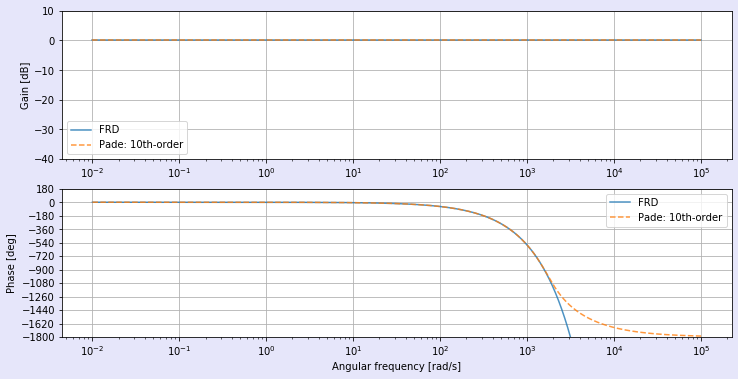

In [3]:
# ボード線図
## プロット準備
fig, ax = plt.subplots(2, 1, figsize = (12, 6))
fig.patch.set_facecolor('lavender')
omega = np.logspace(-2, 5, 1000)

# FRD
gain_frd, phase_frd, omega_p = bode(sys_frd, omega, Plot = False)
ax[0].semilogx(omega_p, 20 * np.log10(gain_frd), ls = '-', label = 'FRD', alpha = 0.8)
ax[1].semilogx(omega_p, phase_frd * 180 / np.pi, ls = '-', label = 'FRD', alpha = 0.8)
 
# パデ近似
gain_pade, phase_pade, omega_p = bode(sys_pade, omega, Plot = False)
ax[0].semilogx(omega_p, 20 * np.log10(gain_pade), ls = '--', label = f'Pade: {N}th-order', alpha = 0.8)
ax[1].semilogx(omega_p, phase_pade * 180 / np.pi, ls = '--', label = f'Pade: {N}th-order', alpha = 0.8)

## ゲイン線図設定
ax[0].set_ylabel('Gain [dB]')
ax[0].set_ylim(-40, 10)
ax[0].grid()
ax[0].legend()

## 位相線図設定
ax[1].set_xlabel('Angular frequency [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim(-1800, 180)
ax[1].set_yticks(range(-1800, 240, 180))
ax[1].grid()
ax[1].legend()

C:\Users\XXXXXXX\Anaconda3\lib\site-packages\scipy\sparse\linalg\matfuncs.py:705: LinAlgWarning: Ill-conditioned matrix (rcond=5.82083e-51): result may not be accurate.
  return solve(Q, P)


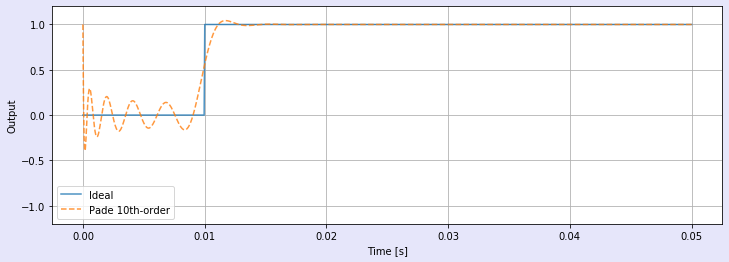

In [4]:
# 時間応答
## 時間応答計算
t = np.linspace(0, 0.05, 1000)
y_ideal = (t > T_d).astype(np.float)
y_pade, t_p = step(sys_pade, t)

## プロット
fig, ax = plt.subplots(figsize = (12, 4))
fig.patch.set_facecolor('lavender')
ax.plot(t_p, y_ideal, ls = '-', label='Ideal', alpha = 0.8)
ax.plot(t_p, y_pade, ls = '--', label=f'Pade {N}th-order', alpha = 0.8)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Output')
ax.set_ylim(-1.2, 1.2)
ax.grid()
ax.legend()